# Phase 1 Code Challenge
This code challenge is designed to test your understanding of the Phase 1 material. It covers:

- Pandas
- Data Visualization
- Exploring Statistical Data
- Python Data Structures

*Read the instructions carefully.* Your code will need to meet detailed specifications to pass automated tests.

## Code Tests

We have provided some code tests for you to run to check that your work meets the item specifications. Passing these tests does not necessarily mean that you have gotten the item correct - there are additional hidden tests. However, if any of the tests do not pass, this tells you that your code is incorrect and needs changes to meet the specification. To determine what the issue is, read the comments in the code test cells, the error message you receive, and the item instructions.

---
## Part 1: Pandas [Suggested Time: 15 minutes]
---
In this part, you will preprocess a dataset from the video game [FIFA19](https://www.kaggle.com/karangadiya/fifa19), which contains data from the players' real-life careers.

In [2]:
# Run this cell without changes

import pandas as pd
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')

### 1.1) Read `fifa.csv` into a pandas DataFrame named `df`

Use pandas to create a new DataFrame, called `df`, containing the data from the dataset in the file `fifa.csv` in the folder containing this notebook. 

Hint: Use the string `'./fifa.csv'` as the file reference.

In [3]:
# CodeGrade step1.1
# Replace None with appropriate code

df = pd.read_csv('./fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


In [4]:
# This test confirms that you have created a DataFrame named df

assert type(df) == pd.DataFrame

### 1.2) Convert the `'Release Clause'` values from Euros to dollars

The `'Release Clause'` variable contains prices denominated in Euros. Use the exchange rate `1 Euro = 1.2 Dollars` to convert the prices to dollars. 

In [5]:
df['Release Clause'].head()

0    226500.0
1    127100.0
2    228100.0
3    138600.0
4    196400.0
Name: Release Clause, dtype: float64

In [6]:
# CodeGrade step1.2
# Replace None with appropriate code

df['Release Clause'] = df['Release Clause'] * 1.2

In [7]:
df['Release Clause'].head()

0    271800.0
1    152520.0
2    273720.0
3    166320.0
4    235680.0
Name: Release Clause, dtype: float64

### 1.3) Drop rows from `df` with missing values for the `'Release Clause'` feature.
    
Make sure that `df` remains the name of the dataset with the dropped rows.

In [8]:
df['Release Clause'].shape[0]

18207

In [9]:
 df['Release Clause'].isna().any()

True

In [10]:
# CodeGrade step1.3
# Replace None with appropriate code

df = df.dropna(subset = ['Release Clause'])

In [11]:
df['Release Clause'].isna().any()

False

In [12]:
# This test confirms that your dataset has the correct number of observations after dropping

assert df['Release Clause'].shape[0] == 16643

### 1.4) Create a list `top_10_countries` containing the names of the 10 countries with the most players (using the `'Nationality'` column).

Hint: Your answer should include England, Germany, Spain, France, and Argentina

In [13]:
df['Nationality'].value_counts().sort_values(ascending=False).head(10).index.astype(str)

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object', name='Nationality')

In [14]:
# CodeGrade step1.4
# Replace None with appropriate code

top_10_countries = df['Nationality'].value_counts().sort_values(ascending=False).head(10).index.tolist()

In [15]:
top_10_countries

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

In [16]:
type(top_10_countries)

list

In [17]:
# This test confirms that you have created a list named top_10_countries

assert type(top_10_countries) == list

# This test confirms that top_10_countries contains England, Germany, Spain, France, and Argentina

assert set(['England', 'Germany', 'Spain', 'France', 'Argentina']).issubset(set(top_10_countries))

## Part 2: Data Visualization [Suggested Time: 20 minutes]
This part uses the same FIFA dataset, and asks you to plot data using `matplotlib`.

In [18]:
# Run this cell without changes

import matplotlib
import matplotlib.pyplot as plt

### 2.1) Create a matplotlib figure `player_count_figure` containing a labeled bar chart with the number of players from England, Germany, Spain, France, and Argentina

Use the strings provided below (`bar_chart_title`, `bar_chart_count_label`, and `bar_chart_series_label`) to title and label your bar chart. 

Hint: These are the countries with the top 5 numbers of players, so you may be able to adapt some of the code you used for question 1.4. If you were unable to complete 1.4, use the following values:

```
Country Name  | Num Players
============  | ===========
England       | 1000
Germany       | 900
Spain         | 800
France        | 700
Argentina     | 600
```

Text(0, 0.5, 'Number of Players')

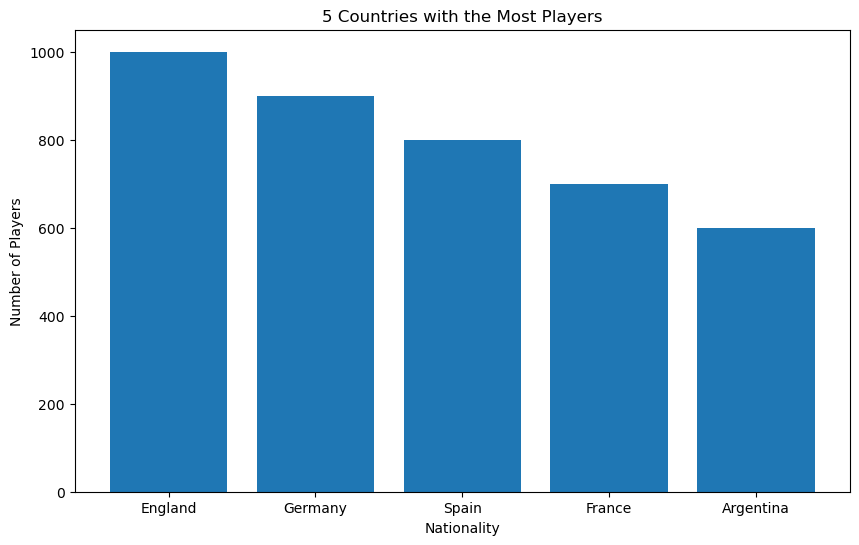

In [19]:
# CodeGrade step2.1
# Replace None with appropriate code

bar_chart_countries = ['England', 'Germany', 'Spain', 'France', 'Argentina']

bar_chart_title = '5 Countries with the Most Players'
bar_chart_count_label = 'Number of Players'
bar_chart_series_label = 'Nationality'



top_5_countries = bar_chart_countries

player_count_figure, ax = plt.subplots(figsize=(10, 6))


x = top_5_countries
heights = [1000,900,800,700,600]

ax.bar(x, heights)
# title
ax.set_title(bar_chart_title)
# x-axis label
ax.set_xlabel(bar_chart_series_label)
# y-axis label
ax.set_ylabel(bar_chart_count_label)

In [20]:
# This test confirms that you have created a figure named player_count_figure

assert type(player_count_figure) == plt.Figure

# This test confirms that the figure contains exactly one axis

assert len(player_count_figure.axes) == 1

In [21]:
# These tests confirm that the figure has a title and axis labels 

assert player_count_figure.axes[0].get_title() != ''
assert player_count_figure.axes[0].get_ylabel() != ''
assert player_count_figure.axes[0].get_xlabel() != ''

### 2.2) Create a matplotlib figure `tackle_figure` containing a labeled scatter plot visualizing the relationship between `StandingTackle` (on X axis) and `SlidingTackle` (on Y axis)

Use the strings provided below (`scatter_plot_title`, `standing_tackle_label`, and `sliding_tackle_label`) to title and label your scatter plot. 

Text(0, 0.5, 'Sliding Tackles')

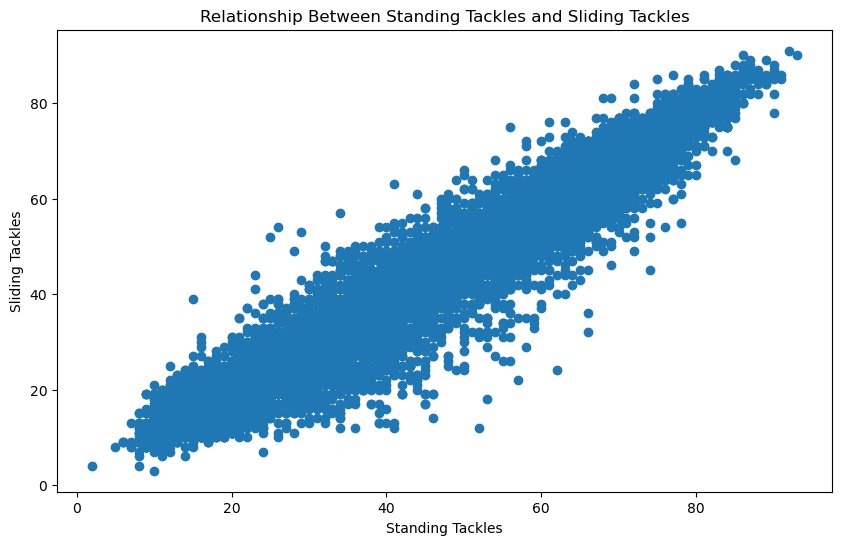

In [22]:
# CodeGrade step2.2

scatter_plot_title = 'Relationship Between Standing Tackles and Sliding Tackles'
standing_tackle_label = 'Standing Tackles'
sliding_tackle_label = 'Sliding Tackles'

tackle_figure, ax = plt.subplots(figsize=(10, 6))

# Your code here
ax.scatter(df['StandingTackle'], df['SlidingTackle'])
# title
ax.set_title(scatter_plot_title)
# x-axis label
ax.set_xlabel(standing_tackle_label)
# y-axis label
ax.set_ylabel(sliding_tackle_label)

In [23]:
# This test confirms that you have created a figure named tackle_figure

assert type(tackle_figure) == plt.Figure

# This test confirms that the figure contains exactly one axis

assert len(tackle_figure.axes) == 1

## Part 3: Exploring Statistical Data [Suggested Time: 20 minutes]
This part does some exploratory analysis using the same FIFA dataset.

### 3.1) Create numeric variables `mean_age` and `median_age` containing the mean and median player ages (respectively).

In [24]:
# CodeGrade step3.1
# Replace None with appropriate code

mean_age = df['Age'].mean()
median_age = df['Age'].median()

In [25]:
# These tests confirm that you have created numeric variables named mean_age and median_age

assert isinstance(mean_age, Number)
assert isinstance(median_age, Number)

### 3.2) Create a string variable `oldest_argentine_name` and a numeric variable `oldest_argentine_age` containing the name and age (respectively) of the oldest player with Argentina nationality.

In [42]:
# CodeGrade step3.2
# Replace None with appropriate code

argentines = df[df['Nationality'] == 'Argentina']

# oldest Argentine player
oldest_argentine = argentines.loc[argentines['Age'].idxmax()]

oldest_argentine_name = oldest_argentine['Name']
oldest_argentine_age = oldest_argentine['Age']

In [43]:
# This test confirms that you have created a string variable named oldest_argentine_name

assert type(oldest_argentine_name) == str

# This test confirms that you have created a numeric variable named oldest_argentine_age

assert isinstance(oldest_argentine_age, Number)

## Part 4: Python Data Structures [Suggested Time: 20 min]

Below is a dictionary `players` with information about soccer players. The keys are player names and the values are dictionaries containing each player's age, nationality, and a list of teams they have played for.

In [135]:
# Run this cell without changes

players = {
    'L. Messi': {
        'age': 31,
        'nationality': 'Argentina',
        'teams': ['Barcelona']
    },
    'Cristiano Ronaldo': {
        'age': 33,
        'nationality': 'Portugal',
        'teams': ['Juventus', 'Real Madrid', 'Manchester United']
    },
    'Neymar Jr': {
        'age': 26,
        'nationality': 'Brazil',
        'teams': ['Santos', 'Barcelona', 'Paris Saint-German']
    },
    'De Gea': {
        'age': 27,
        'nationality': 'Spain',
        'teams': ['Atletico Madrid', 'Manchester United']
    },
    'K. De Bruyne': {
        'age': 27,
        'nationality': 'Belgium',
        'teams': ['Chelsea', 'Manchester City']
    }
}

### 4.1) Create a list `player_names` of all the player names in dictionary `players`. 

In [136]:
# CodeGrade step4.1
# Replace None with appropriate code

player_names = list(players.keys())

In [138]:
player_names

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'De Gea', 'K. De Bruyne']

In [137]:
# This test confirms that you have created a list named player_names

assert type(player_names) == list

### 4.2) Create a list of tuples `player_nationalities` containing each player's name along with their nationality.

In [156]:
# CodeGrade step4.2
# Replace None with appropriate code

player_nationalities = [(player_names, player_profile['nationality']) for player_names, player_profile in players.items()]
# print(player_nationalities)


In [158]:
# This test confirms that you have created a list named player_nationalities

assert type(player_nationalities) == list

### 4.3) Define a function `get_players_on_team()` that returns a list of names of all the players who have played on a given team.

Your function should take two arguments:

- A dictionary of player information
- A string containing a team name (for which you are trying to find the player names)

In [159]:
# CodeGrade step4.3

def get_players_on_team(player_dict, team_name):
    player_list = []

    # Your code here
    for player_name, player_info in player_dict.items(): 
        if team_name in player_info ["teams"]:
             player_list.append(player_name)
    return player_list


In [160]:
# This test confirms that get_players_on_team() returns the right names for Manchester United

manchester_united_players = ['Cristiano Ronaldo', 'De Gea']
players_on_manchester_united = get_players_on_team(players, 'Manchester United')

assert players_on_manchester_united == manchester_united_players